In [60]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [4]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

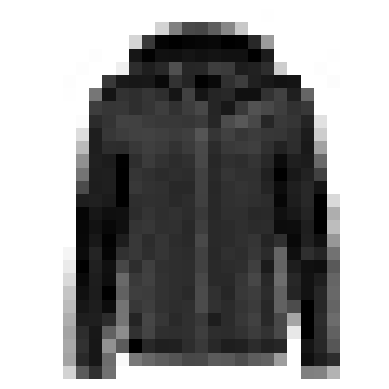

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

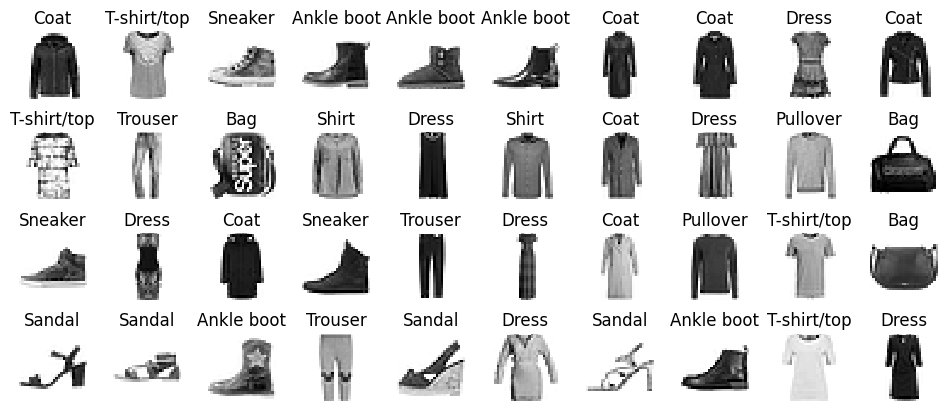

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [67]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [68]:
hidden1 = model.layers[1]
hidden1.name

weights, biases = hidden1.get_weights()

In [12]:
weights

array([[-0.0654877 , -0.03345267,  0.01918563, ..., -0.04268146,
        -0.01693919,  0.02609479],
       [-0.00479057,  0.06058703, -0.02570045, ...,  0.07395384,
        -0.06965996,  0.00721283],
       [-0.04554318,  0.01156678, -0.04509785, ..., -0.00560389,
         0.06058736,  0.04883316],
       ...,
       [-0.02834741, -0.0454784 , -0.05156522, ..., -0.07057262,
        -0.04086291, -0.04169185],
       [ 0.02153065,  0.0579582 ,  0.03793435, ..., -0.07074179,
         0.0119548 ,  0.06937841],
       [ 0.0444611 , -0.0343551 , -0.01253736, ..., -0.01728125,
         0.02271627,  0.06242128]], dtype=float32)

In [13]:
print(weights.shape)

(784, 300)


In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [69]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [70]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7097 - accuracy: 0.7696 - val_loss: 0.5179 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4878 - accuracy: 0.8284 - val_loss: 0.4369 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4417 - accuracy: 0.8440 - val_loss: 0.5488 - val_accuracy: 0.7968
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4145 - accuracy: 0.8558 - val_loss: 0.3935 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3959 - accuracy: 0.8617 - val_loss: 0.3786 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8676 - val_loss: 0.3750 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8723 - val_loss: 0.3632 - val_accuracy:

In [17]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [18]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

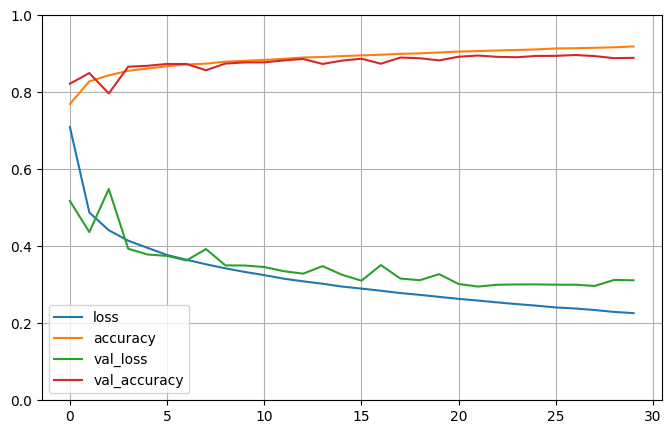

In [71]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
model.evaluate(X_test, y_test)

 51/313 [===>..........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.8866

2024-05-20 23:59:21.811767: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8786


[0.3451786935329437, 0.878600001335144]

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 104ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
predicted_classes = np.argmax(y_proba, axis=1)

In [24]:
np.array(class_names)[predicted_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

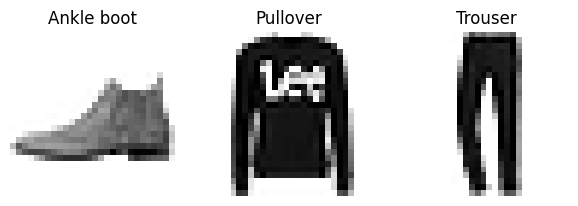

In [25]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[predicted_classes[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

In [32]:
activation_functions = ["relu", "elu", "LeakyReLU"]

In [34]:
models_history = []

for activation in activation_functions:
    model = Sequential([
        Flatten(input_shape=[28, 28]),
        Dense(300, activation=activation),
        Dense(100, activation=activation),
        Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))
    models_history.append((model, history))
    print(f'finished {activation}')

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7293 - accuracy: 0.7605 - val_loss: 0.5252 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4927 - accuracy: 0.8276 - val_loss: 0.4426 - val_accuracy: 0.8458
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4454 - accuracy: 0.8427 - val_loss: 0.5458 - val_accuracy: 0.7968
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4176 - accuracy: 0.8536 - val_loss: 0.3967 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3985 - accuracy: 0.8608 - val_loss: 0.3776 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3793 - accuracy: 0.8663 - val_loss: 0.3731 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3667 - accuracy: 0.8702 - val_loss: 0.3655 - val_accuracy:

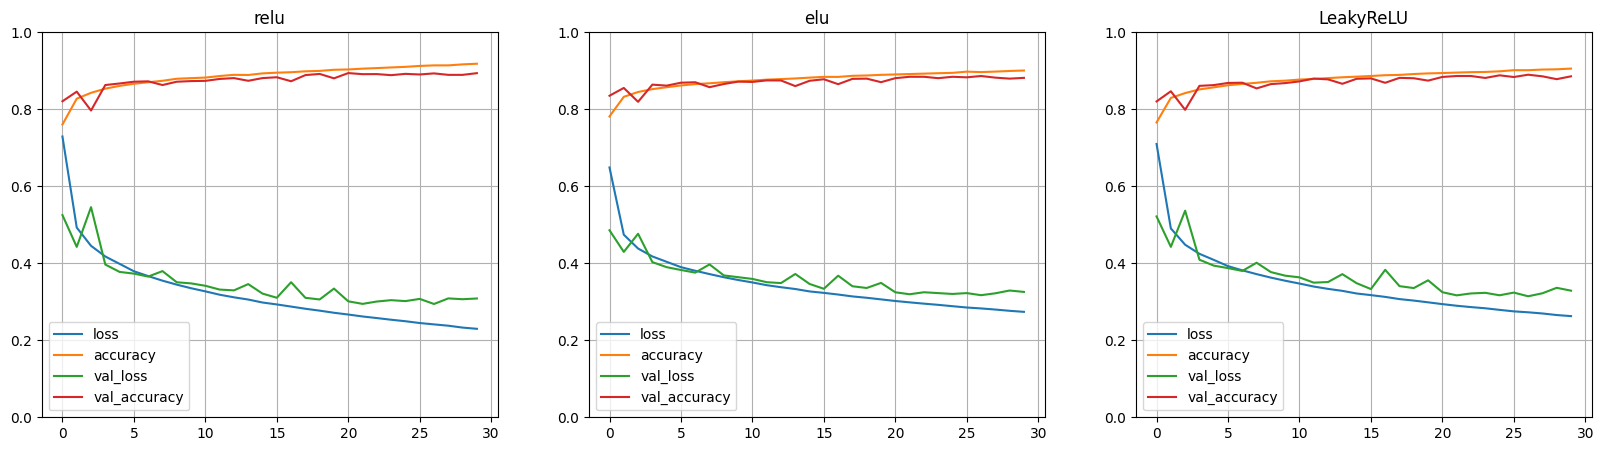

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i, (model, history) in enumerate(models_history):
    pd.DataFrame(history.history).plot(ax=axs[i])
    axs[i].set_title(activation_functions[i])
    axs[i].set_ylim(0, 1)
    axs[i].grid(True)
    axs[i].legend()

In [65]:
df = pd.DataFrame(columns=["activation", "accuracy"])

for i, (model, history) in enumerate(models_history):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    df.loc[i] = [activation_functions[i], accuracy]

df

313/313 [==============================] - 1s 2ms/step


,activation,accuracy
0,relu,0.8799
1,elu,0.8712
2,LeakyReLU,0.8738


# Zad. 
Stwórz wykres porównujący metody. 

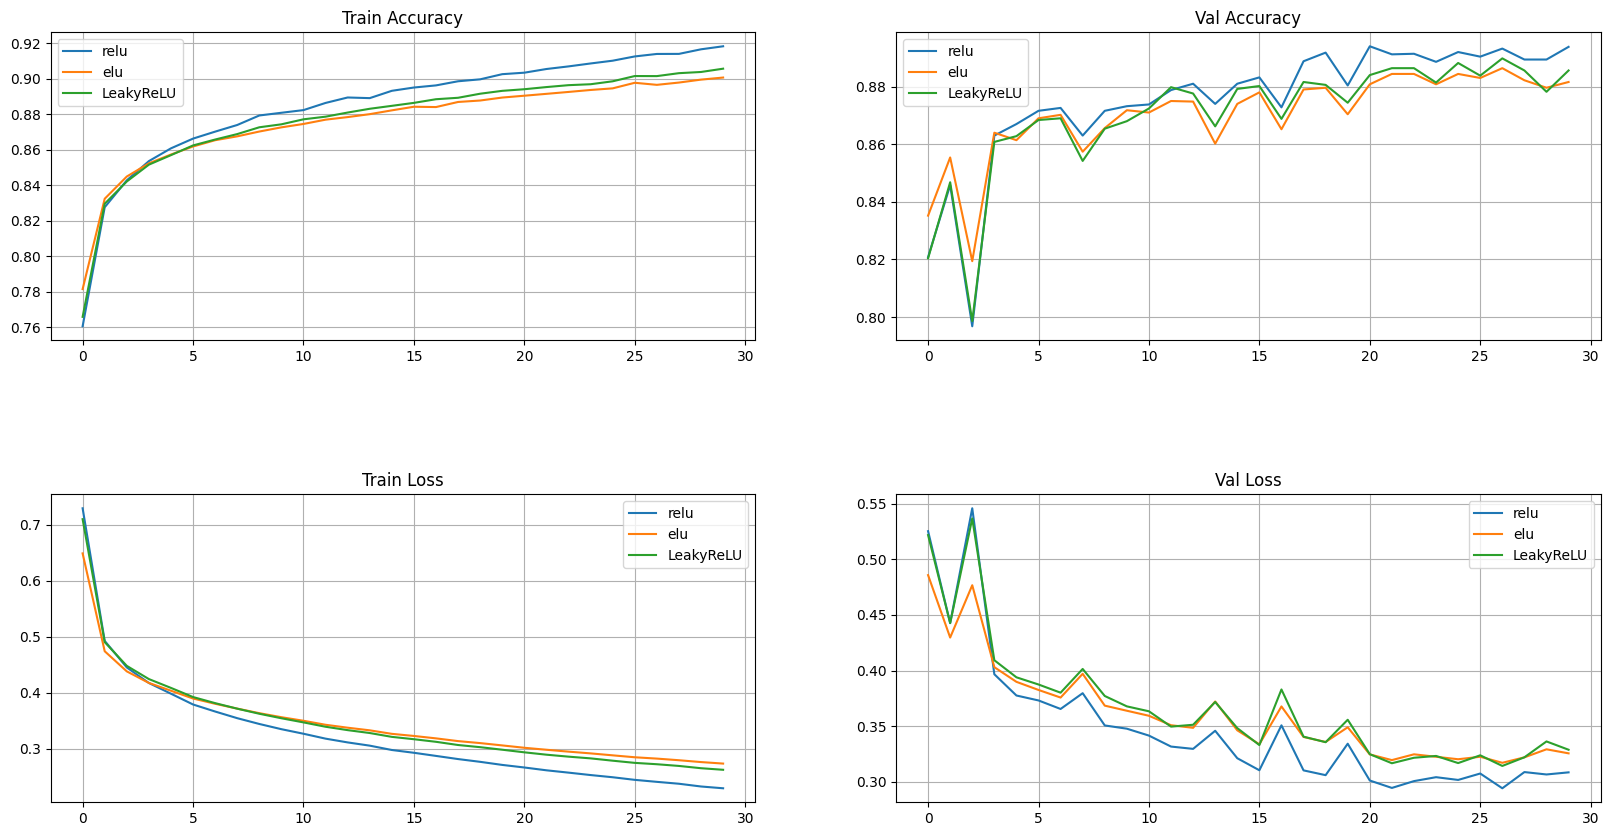

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

for i, (_, history) in enumerate(models_history):
    axs[0][0].plot(history.history['accuracy'], label=f'{activation_functions[i]}')
    axs[0][1].plot(history.history['val_accuracy'], label=f'{activation_functions[i]}')
    axs[1][0].plot(history.history['loss'], label=f'{activation_functions[i]}')
    axs[1][1].plot(history.history['val_loss'], label=f'{activation_functions[i]}')

axs[0][0].set_title('Train Accuracy')
axs[0][1].set_title('Val Accuracy')
axs[1][0].set_title('Train Loss')
axs[1][1].set_title('Val Loss')

for ax in axs.flatten():
    ax.legend()
    ax.grid(True)

plt.subplots_adjust(hspace=0.5)
plt.show()